In [3]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

/Users/Joel/Library/Python/3.7/lib/python/site-packages/urllib3/__init__.py:38: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  exceptions.NotOpenSSLWarning,


In [4]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from mock_trade import MockTrade, Trade
from datetime import datetime
from backend import Backend
from cert import TiingoKey
from main import *

import matplotlib.pyplot as plt
from frontend import Frontend


# Api Source

In [396]:
START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')

In [295]:
tiingo_source = TiingoApiSource(TiingoKey)
data = tiingo_source.fetch_data('BRK-B', START_DATE, END_DATE)

📡 [Tiingo] Fetching data for BRK-B from 2007-10-01 to 2009-02-01...
✓ [Tiingo] Successfully fetched 337 days of data


In [15]:
ashare_source = AshareApiSource()
data = ashare_source.fetch_data('sh000001', START_DATE, END_DATE)

📡 [Sina] Fetching A-share data for sh000001 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2000-01-04 to 2025-09-26 (6239 days)
✓ [Sina] Successfully fetched 6239 trading days of data


In [354]:
fed_source = FederalFinanceAPI()
data = fed_source.fetch_data('tbill_rates', START_DATE, END_DATE)

📡 [Treasury] Fetching Treasury Bill Interest Rates from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 296 records


In [397]:
bls_source = BureauOfLaborStatisticsAPI()
data = bls_source.fetch_data('cpi_inflation', START_DATE, END_DATE)

📡 [BLS] Fetching Consumer Price Index (CPI) - Inflation Data from 2000 to 2025...
Converting CPI absolute values to year-over-year percentage changes...
✓ Converted to YoY percentage changes. Valid values: 108/120
✓ [BLS] Successfully fetched 120 records


# Crawler



In [14]:
# crawler1 = Crawler(TiingoApiSource(TiingoKey, quota_limit=40))

# crawler1.backfill_portfolio_stocks(portfolio_names=["us_stock"])

crawler2 = Crawler(AshareApiSource(quota_limit=100))

crawler2.backfill_portfolio_stocks(portfolio_names=["chinese_stock"])

✓ Crawler initialized with AshareApiSource
✓ Data will be stored in: /Users/Joel/PycharmProjects/StockAnalysis/data/stock_data.pkl
🔍 Processing 1 portfolio file(s)
✓ Found: chinese_stock.json
📄 Processing: chinese_stock.json
🎯 Found 2 unique stock symbols
📅 Biggest date in portfolio: 2025-10-01
   SH510050: existing data until 2025-09-26, will fetch from 2025-09-27
   SH588000: existing data until 2025-09-26, will fetch from 2025-09-27
📊 Fetching data from 2025-09-27 to 2025-10-01
🚀 Starting batch crawl for 2 symbols from 2025-09-27 to 2025-10-01
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (2 symbols)
[1/2] Processing SH510050...
📊 Insufficient data for SH510050 (ashare): 0.0% coverage (5010 days, missing 3 days)
📡 [Sina] Fetching A-share data for sh510050 from 2025-09-27 to 2025-10-01...
📊 [Sina] Retrieved data from 2025-09-29 to 2025-09-30 (2 days)
✓ [Sina] Successfully fetched 2 trading days of data
[2/2] Processing SH588000...
📊 Insufficient data for

{'successful': ['SH510050', 'SH588000'], 'failed': []}

In [11]:
crawler = Crawler(TiingoApiSource(TiingoKey, quota_limit=40))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['IAU']

crawler.crawl(symbols, START_DATE, END_DATE, force=True)

✓ Crawler initialized with TiingoApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 1 symbols from 2000-01-01 to 2025-10-01
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (1 symbols)
[1/1] Processing IAU...
📡 [Tiingo] Fetching data for IAU from 2000-01-01 to 2025-10-01...
✓ [Tiingo] Successfully fetched 5201 days of data
💾 Writing batch 1 (1 symbols) to database...
📂 Data loaded: 433038 rows
✓ Database initialized: 433038 rows from data/stock_data.pkl
📊 Merged data: 427837 existing + 5201 new = 433038 total rows
💾 Database saved: 433038 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 1 symbols
   IAU


'data/stock_data.pkl'

In [44]:
crawler = Crawler(AshareApiSource(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['SH512170', 'SZ159766', 'SZ159855', 'SH588000', "SZ159869", 'SZ159936', 'SH510050', 'SH000001', 'SH000300']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with AshareApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 9 symbols from 2000-01-01 to 2025-09-27
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (9 symbols)
[1/9] Processing SH512170...
📂 Data loaded: 353917 rows
✓ Database initialized: 353917 rows from data/stock_data.pkl
📡 [Sina] Fetching A-share data for sh512170 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2019-06-17 to 2025-09-26 (1528 days)
✓ [Sina] Successfully fetched 1528 trading days of data
[2/9] Processing SZ159766...
📡 [Sina] Fetching A-share data for sz159766 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-07-23 to 2025-09-26 (1016 days)
✓ [Sina] Successfully fetched 1016 trading days of data
[3/9] Processing SZ159855...
📡 [Sina] Fetching A-share data for sz159855 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-02-26 to 2025-09-26 (1116 days)
✓ [Sina] Successfully fetched 1116 tradi

'data/stock_data.pkl'

In [356]:
crawler = Crawler(FederalFinanceAPI(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['tbill_rates']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with FederalFinanceAPI
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 1 symbols from 2000-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (1 symbols)
[1/1] Processing TBILL_RATES...
📂 Data loaded: 404720 rows
✓ Database initialized: 404720 rows from data/stock_data.pkl
📡 [Treasury] Fetching Treasury Bill Interest Rates from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 296 records
💾 Writing batch 1 (1 symbols) to database...
📊 Merged data: 404720 existing + 296 new = 405016 total rows
💾 Database saved: 405016 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 1 symbols
   TBILL_RATES


'data/stock_data.pkl'

In [376]:
crawler = Crawler(BureauOfLaborStatisticsAPI(quota_limit=100))

START_DATE = '2020-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['cpi_inflation', 'unemployment_rate']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with BureauOfLaborStatisticsAPI
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 2 symbols from 2020-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (2 symbols)
[1/2] Processing CPI_INFLATION...
📂 Data loaded: 395489 rows
✓ Database initialized: 395489 rows from data/stock_data.pkl
📊 Insufficient data for CPI_INFLATION (bureauoflaborstatisticsapi): 0.0% coverage (240 days, missing 1499 days)
📡 [BLS] Fetching Consumer Price Index (CPI) - Inflation Data from 2020 to 2025...
✓ [BLS] Successfully fetched 68 records
[2/2] Processing UNEMPLOYMENT_RATE...
📊 Insufficient data for UNEMPLOYMENT_RATE (bureauoflaborstatisticsapi): 0.0% coverage (240 days, missing 1499 days)
📡 [BLS] Fetching Unemployment Rate from 2020 to 2025...
✓ [BLS] Successfully fetched 68 records
💾 Writing batch 1 (2 symbols) to database...
📊 Merged data: 395489 existing + 136 new = 395625 total rows
💾 Database saved: 395625 rows to 

'data/stock_data.pkl'

# Database

In [15]:
# Initialize database
db = Database("data/stock_data.pkl")

# Explore what's available
print(f"Symbols: {db.get_symbols()}")
print(f"Date range: {db.get_date_range()}")

# Database overview
db.info()

Symbols: ['AAL', 'AAPL', 'ABNB', 'AFRM', 'AGG', 'ALB', 'ALK', 'ALTM', 'AMZN', 'ARKQ', 'ATVI', 'AXP', 'BABA', 'BAC', 'BBY', 'BETZ', 'BIDU', 'BILI', 'BLNK', 'BND', 'BNKU', 'BRK-B', 'BYDDF', 'C', 'CPI_INFLATION', 'CRM', 'CURE', 'DAL', 'DASH', 'DBC', 'DDOG', 'DIDIY', 'DOCU', 'EBAY', 'EMQQ', 'FTEC', 'GLD', 'GOOG', 'GOOGL', 'GS', 'HOOD', 'HUYA', 'IAU', 'IEF', 'INTU', 'IQ', 'JD', 'JETS', 'JOYY', 'JPM', 'JTKWY', 'KNDI', 'LAC', 'LI', 'LUV', 'LYFT', 'MA', 'MDB', 'META', 'MPNGF', 'MS', 'MSFT', 'NDAQ', 'NFLX', 'NIO', 'NIU', 'NKLAQ', 'NVDA', 'ORCL', 'PCRFY', 'PDD', 'PINS', 'PLTR', 'PYPL', 'QQQ', 'QS', 'SAVEQ', 'SH000001', 'SH000300', 'SH510050', 'SH512170', 'SH588000', 'SHOP', 'SHY', 'SMICY', 'SNAP', 'SNOW', 'SPY', 'SZ159766', 'SZ159855', 'SZ159869', 'SZ159936', 'TBILL_RATES', 'TCEHY', 'TIGR', 'TIPS', 'TLT', 'TMF', 'TSLA', 'TWTR', 'UAL', 'UBER', 'UNEMPLOYMENT_RATE', 'UPWK', 'USO', 'V', 'VOO', 'VTI', 'VXUS', 'WFC', 'WORK', 'XIACF', 'XP', 'XPEV', 'XYZ', 'YQ', 'ZM']
Date range: {'start_date': '2000-01

In [19]:
# db.backfill_all_split_adjusted_prices()
db.backfill_split_adjusted_prices('IAU')

Adjusting IAU for 2 splits on columns: ['Open', 'High', 'Low', 'Close', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']
  Applied 0.5x split on 2021-05-24
  Applied 10.0x split on 2010-06-24
  Cleaned up Split_Factor field - set all values to 1.0
💾 Database saved: 433038 rows to data/stock_data.pkl
✓ Split-adjusted prices saved for IAU


In [18]:
db.get_split_history("IAU")

,split_factor
date,
2010-06-24,10.0
2021-05-24,0.5


In [381]:
db.backfill_sparse_prices('cpi_inflation')

Creating complete date range for unemployment_rate from 2000-01-01 to 2025-08-01 (freq: D)
Backfilling unemployment_rate on columns: ['Open', 'High', 'Low', 'Close', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']
Original data points: 308, Complete range: 9345
✓ Added 9037 missing dates
💾 Database saved: 413699 rows to data/stock_data.pkl
✓ Backfilled sparse dates and prices saved for unemployment_rate


In [16]:
db.query(symbol='SH510050')

,Close,High,Low,Open,Volume,Adj_Close,Adj_High,Adj_Low,Adj_Open,Adj_Volume,Dividend,Split_Factor,symbol,source,last_updated
2005-02-23,0.876,0.882,0.866,0.881,1.269743e+09,0.876,0.882,0.866,0.881,1.269743e+09,0.0,1.0,SH510050,ashare,NaT
2005-02-24,0.876,0.876,0.868,0.876,4.516142e+08,0.876,0.876,0.868,0.876,4.516142e+08,0.0,1.0,SH510050,ashare,NaT
2005-02-25,0.880,0.887,0.875,0.877,5.064607e+08,0.880,0.887,0.875,0.877,5.064607e+08,0.0,1.0,SH510050,ashare,NaT
2005-02-28,0.872,0.879,0.870,0.878,1.879652e+08,0.872,0.879,0.870,0.878,1.879652e+08,0.0,1.0,SH510050,ashare,NaT
2005-03-01,0.867,0.873,0.865,0.870,2.080945e+08,0.867,0.873,0.865,0.870,2.080945e+08,0.0,1.0,SH510050,ashare,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,3.072,3.077,3.042,3.044,8.089784e+08,3.072,3.077,3.042,3.044,8.089784e+08,0.0,1.0,SH510050,ashare,NaT
2025-09-25,3.087,3.097,3.072,3.074,5.579762e+08,3.087,3.097,3.072,3.074,5.579762e+08,0.0,1.0,SH510050,ashare,NaT
2025-09-26,3.077,3.096,3.072,3.077,4.655693e+08,3.077,3.096,3.072,3.077,4.655693e+08,0.0,1.0,SH510050,ashare,NaT
2025-09-29,3.109,3.138,3.054,3.072,1.264089e+09,3.109,3.138,3.054,3.072,1.264089e+09,0.0,1.0,SH510050,ashare,2025-10-02 11:33:54.705334


d# Backend

In [1]:
backend = Backend(Database("data/stock_data.pkl"))

NameError: name 'Backend' is not defined

In [56]:
prices = backend.get_daily_price("SZ159855", '2021-02-01', '2025-09-01')
prices

📂 Retrieved 1097 days of data for SZ159855 from database


,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
date,,,,,,,,
2021-02-26,0.979,0.979,0.961,0.971,22271968,1.0,0.971,22271968
2021-03-01,0.985,0.989,0.971,0.987,22340774,1.0,0.987,22340774
2021-03-02,0.985,0.989,0.965,0.971,11035751,1.0,0.971,11035751
2021-03-03,0.978,0.990,0.969,0.989,10615526,1.0,0.989,10615526
2021-03-04,0.975,0.989,0.972,0.976,10074636,1.0,0.976,10074636
...,...,...,...,...,...,...,...,...
2025-08-26,0.999,1.014,0.992,1.010,17868403,1.0,1.010,17868403
2025-08-27,1.010,1.020,0.989,0.990,24385906,1.0,0.990,24385906
2025-08-28,0.989,1.006,0.967,0.999,21214301,1.0,0.999,21214301


In [432]:
backend.get_yoy_cpi_inflation()

✓ Calculated year-over-year CPI changes: 296 data points
📈 Retrieved 296 days of YoY CPI inflation data


,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
2001-01-01,3.732227,3.732227,3.732227,3.732227,0.0,1.0,175.100,0.0
2001-02-01,3.533569,3.533569,3.533569,3.533569,0.0,1.0,175.800,0.0
2001-03-01,2.920561,2.920561,2.920561,2.920561,0.0,1.0,176.200,0.0
2001-04-01,3.269119,3.269119,3.269119,3.269119,0.0,1.0,176.900,0.0
2001-05-01,3.615160,3.615160,3.615160,3.615160,0.0,1.0,177.700,0.0
...,...,...,...,...,...,...,...,...
2025-04-01,2.311289,2.311289,2.311289,2.311289,0.0,1.0,320.795,0.0
2025-05-01,2.354897,2.354897,2.354897,2.354897,0.0,1.0,321.465,0.0
2025-06-01,2.669213,2.669213,2.669213,2.669213,0.0,1.0,322.561,0.0
2025-07-01,2.704902,2.704902,2.704902,2.704902,0.0,1.0,323.048,0.0


# MockTrade

In [17]:
## Plots
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "BRK-B"

mock_trader = MockTrade(
    backend=backend,
    trade_history=[
        Trade(symbol=EQUITY, cash_amount=500000, date=START_DATE),
        Trade(symbol="TLT", cash_amount=300000, date=START_DATE),
        Trade(symbol="IAU", cash_amount=100000, date=START_DATE),
        Trade(symbol="DBC", cash_amount=100000, date=START_DATE),
        Trade(symbol="DBC", cash_amount=-INF, date='2008-06-25'),
        Trade(symbol=EQUITY, cash_amount=INF, date='2008-06-26'),
        Trade(symbol="TLT", cash_amount=-INF, date='2008-12-22'),
        Trade(symbol=EQUITY, cash_amount=INF, date='2008-12-23'),
        Trade(symbol=EQUITY, percentage=-20, date='2021-02-01'),
        Trade(symbol="DBC", cash_amount=INF, date='2021-02-02'),
        Trade(symbol="DBC", cash_amount=-INF, date='2022-07-25'),
        Trade(symbol=EQUITY, cash_amount=INF, date='2022-07-26'),
    ],
    start_date=START_DATE,
    end_date=END_DATE,
    name="SPY50-TLT25-IAU10-DBC15",
    benchmark_symbol="SPY",
)

In [18]:
portfolio_df = mock_trader.mock()

Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    BRK-B    6862     $72.86     $499965.32   $500034.68   BRK-B:6862     
2   2007-01-03   BUY    TLT      3368     $89.07     $299987.76   $200046.92   TLT:3368       
3   2007-01-03   BUY    IAU      8025     $12.46     $99991.50    $100055.42   IAU:8025       
4   2007-01-03   BUY    DBC      4201     $23.80     $99983.38    $72.04       DBC:4201       
         Adjusted to sell 4201 shares instead
5   2008-06-25   SELL   DBC      4201     $44.01     $184886.01   $184958.05   DBC:0           (CLIPPED)
         Adjusted to buy 2290 shares instead ($184917.50)
6   2008-06-26   BUY    BRK-B    2290     $80.75     $184917.50   

In [24]:
portfolio_df.data['2007-01-03':'2007-03-01']

,Close,Open,High,Low,symbol
date,,,,,
2007-01-03,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,SPY50-TLT25-IAU10-DBC15
2007-01-04,9.938494e+05,9.938494e+05,9.938494e+05,9.938494e+05,SPY50-TLT25-IAU10-DBC15
2007-01-05,9.857100e+05,9.857100e+05,9.857100e+05,9.857100e+05,SPY50-TLT25-IAU10-DBC15
2007-01-08,9.879281e+05,9.879281e+05,9.879281e+05,9.879281e+05,SPY50-TLT25-IAU10-DBC15
2007-01-09,9.965119e+05,9.965119e+05,9.965119e+05,9.965119e+05,SPY50-TLT25-IAU10-DBC15
2007-01-10,9.934761e+05,9.934761e+05,9.934761e+05,9.934761e+05,SPY50-TLT25-IAU10-DBC15
2007-01-11,9.942920e+05,9.942920e+05,9.942920e+05,9.942920e+05,SPY50-TLT25-IAU10-DBC15
2007-01-12,9.971698e+05,9.971698e+05,9.971698e+05,9.971698e+05,SPY50-TLT25-IAU10-DBC15
2007-01-15,7.204010e+01,7.204010e+01,7.204010e+01,7.204010e+01,SPY50-TLT25-IAU10-DBC15


# FrontEnd

Style 'seaborn-v0_8' not available, using default


📈 Plotting comparison chart for 4 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest:   645.05 | Min:   222.95 | Max:   648.92 | Avg:   444.52
  AAPL: Latest:   232.14 | Min:    56.09 | Max:   259.02 | Avg:   161.39
  TSLA: Latest:   333.87 | Min:    24.08 | Max:   479.86 | Avg:   225.62
 GOOGL: Latest:   212.91 | Min:    52.71 | Max:   212.91 | Avg:   125.89
cpi_inflation (R): Latest:    2.916 | Min:    0.118 | Max:    9.060 | Avg:    4.022
unemployment_rate (R): Latest:    4.300 | Min:    3.400 | Max:   14.800 | Avg:    4.870
tbill_rates (R): Latest:    4.283 | Min:    0.045 | Max:    5.451 | Avg:    2.676
💡 Hover over the lines to see detailed information
💡 Use plt.show() to display the plot when ready


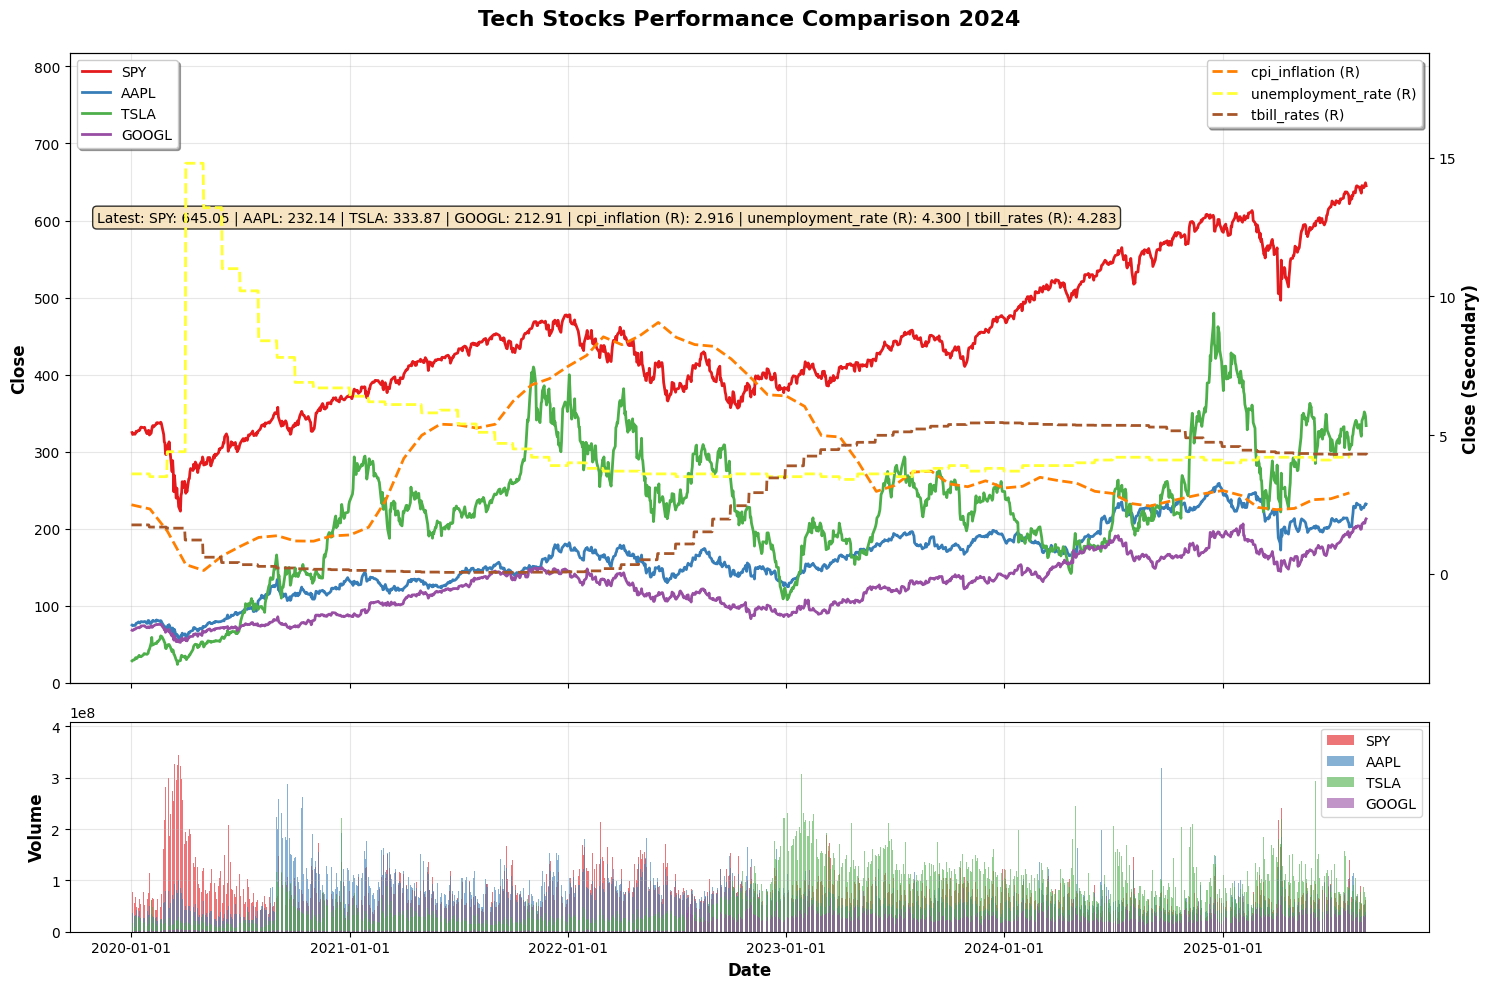

In [9]:

import matplotlib.pyplot as plt
from frontend import Frontend

# Initialize backend and frontend
frontend = Frontend()
backend = Backend(Database("data/stock_data.pkl"))

# Fetch data for multiple stocks
symbols = ['SPY', 'AAPL', 'TSLA', 'GOOGL']
dataframes = []

for symbol in symbols:
    df = backend.get_daily_price(symbol, '2020-01-01', '2025-09-01')
    dataframes.append(df)


# Fetch data for multiple stocks
secondary_symbols = ['cpi_inflation', 'unemployment_rate', 'tbill_rates']
secondary_dataframes = []
secondary_dataframes.append(backend.get_yoy_cpi_inflation('2020-01-01', '2025-09-01'))
secondary_dataframes.append(backend.get_unemployment_rate('2020-01-01', '2025-09-01'))
secondary_dataframes.append(backend.get_interest_rate('2020-01-01', '2025-09-01'))

# Create comparison plot
fig = frontend.plot_price_comparison(
    dataframes=dataframes,
    symbols=symbols,
    title='Tech Stocks Performance Comparison 2024',
    secondary_dataframes=secondary_dataframes,
    secondary_symbols=secondary_symbols,
)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


📈 Plotting comparison chart for 1 symbols...

📊 Summary Statistics:
--------------------------------------------------
SPY50-TLT25-IAU10-DBC15: Latest: 1000939.70 | Min:    72.04 | Max: 1005424.71 | Avg: 948676.83
💡 Hover over the lines to see detailed information
💡 Use plt.show() to display the plot when ready


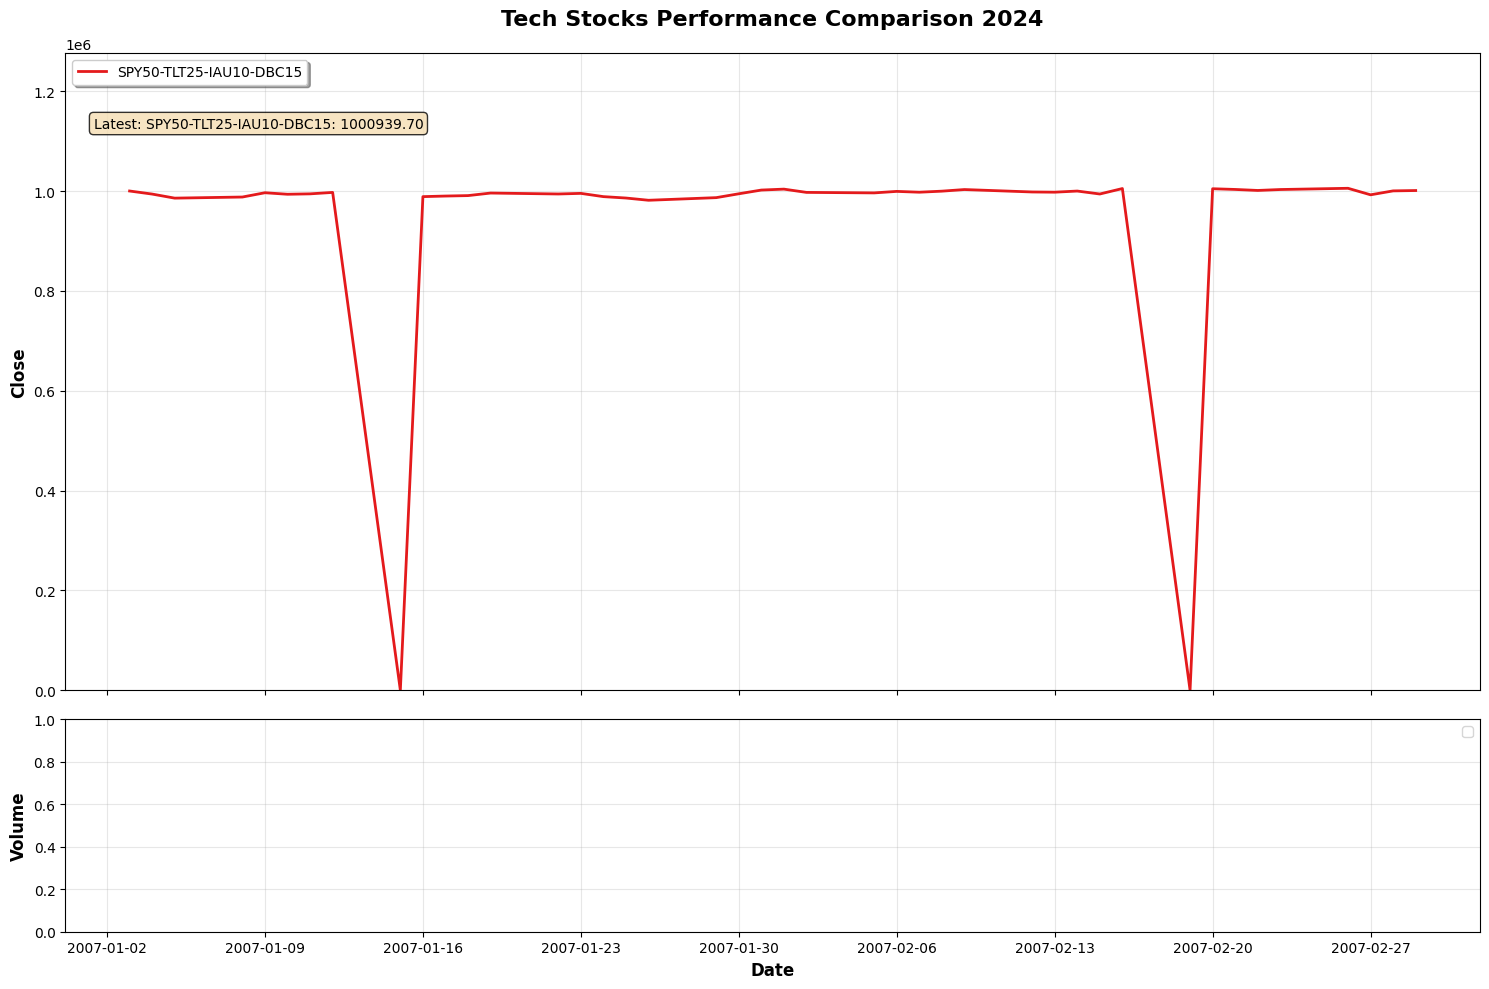

In [25]:
fig = frontend.plot_price_comparison(
    dataframes=[portfolio_df.data['2007-01-03':'2007-03-01']],
    symbols=[portfolio_df.symbol],
    # normalize=[True, True, True, True],
    title='Tech Stocks Performance Comparison 2024'
)

plt.show()